In [1]:
#from subprocess import call
from openalpr import Alpr


## Create images from video

In [ ]:
!mkdir video_to_images_output

In [20]:
!ffmpeg -i wetransfer-249f31/IMG_5314.MOV -vf scale=320:-1 -r 10 video_to_images_output/ffout%3d.png

ffmpeg version 2.8.11-0ubuntu0.16.04.1 Copyright (c) 2000-2017 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.4) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --e

## Use first image to recognize the plate number

In [3]:
alpr = Alpr("eu", "openalpr/config/openalpr.conf", "openalpr/runtime_data")

In [4]:
if not alpr.is_loaded():
     print("Error loading OpenALPR")
     sys.exit(1)

In [5]:
alpr.set_top_n(20)
alpr.set_default_region("md")

results = alpr.recognize_file("video_to_images_output/ffout001.png")
i = 0
for plate in results['results']:
    i += 1
    print("Plate #%d" % i)
    print("   %12s %12s" % ("Plate", "Confidence"))
    for candidate in plate['candidates']:
        prefix = "-"
        if candidate['matches_template']:
            prefix = "*"

        print("  %s %12s%12f" % (prefix, candidate['plate'], candidate['confidence']))

# Call when completely done to release memory
alpr.unload()

Plate #1
          Plate   Confidence
  -       HH819V   91.885132
  -       HH8I9V   87.774323
  -        HH89V   82.417389
  -       MH819V   80.799347
  -       HM819V   80.533356
  -       HHB19V   76.854019
  -       MH8I9V   76.688553
  -       HM8I9V   76.422562
  -       HH819Y   76.391693
  -        HH819   75.340149
  -       HHBI9V   72.743225
  -       HH8I9Y   72.280891
  -        MH89V   71.331604
  -        HH8I9   71.229347
  -        HM89V   71.065613
  -       MM819V   69.447586
  -        HHB9V   67.386276
  -        HH89Y   66.923950
  -       MHB19V   65.768234
  -       HMB19V   65.502251


In [24]:
top_candidate = plate['candidates'][0]['plate']

In [25]:
top_candidate

u'HH819V'

## DeepMask


In [26]:
!mkdir deepmask_output

## Write down bash script for deepmask

In [33]:
#!. torch/install/bin/torch-activate

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


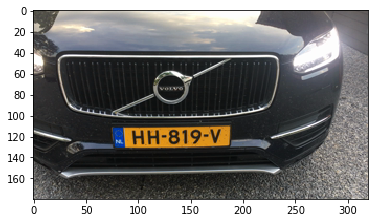

In [23]:
img = mpimg.imread('video_to_images_output/ffout001.png')
imgplot = plt.imshow(img)
plt.show()

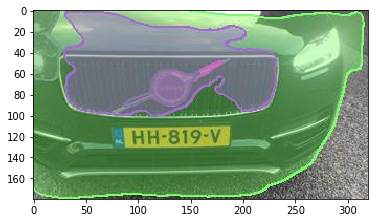

In [17]:
res = mpimg.imread('deepmask_output/res.jpg')
imgplot = plt.imshow(res)
plt.show()

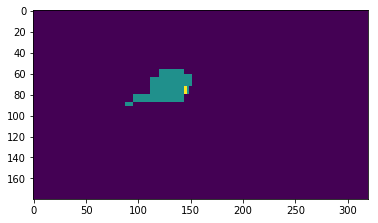

In [19]:
mask = mpimg.imread('deepmask_output/mask_4.jpg')
imgplot = plt.imshow(mask)
plt.show()

In [22]:
mask[mask > 0] = 1

In [52]:
mask3d = np.tile(mask, (3, 1, 1)).transpose(1, 2, 0)

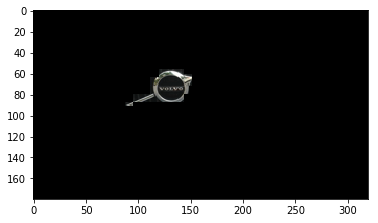

In [94]:
plt.imshow(img * mask3d)

In [102]:
import Image
from scipy.misc import toimage

In [103]:
logo = toimage(img * mask3d)

In [109]:
logoBox = logo.getbbox()
cropped = logo.crop(logoBox)
cropped.save('deepmask_output/cropped_logo.jpg')

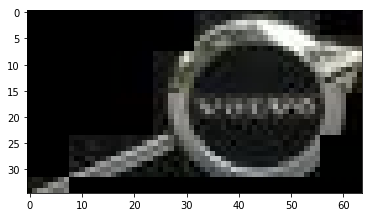

In [110]:
test = mpimg.imread('deepmask_output/cropped_logo.jpg')
imgplot = plt.imshow(test)
plt.show()